# PR_HW8

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 36s 37ms/step - loss: 0.1591 - accuracy: 0.9508
Epoch 2/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0467 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0327 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0192 - accuracy: 0.9940


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0295 - accuracy: 0.9905
Test accuracy: 0.990


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

Downloading the Data

（用jupyter notebook做的 所以以下這段不需要）

In [8]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

命令語法不正確。
'cp' 不是內部或外部命令、可執行的程式或批次檔。
'chmod' 不是內部或外部命令、可執行的程式或批次檔。


In [10]:
!kaggle competitions download -c dogs-vs-cats

'kaggle' 不是內部或外部命令、可執行的程式或批次檔。


In [0]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

（換成自己的dataset）

In [25]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dogs-vs-cats/train")
new_base_dir = pathlib.Path("./dogs-vs-cats/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [28]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [29]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [30]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [31]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [32]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [33]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [34]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 58s 905ms/step - loss: 0.7810 - accuracy: 0.5040 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 57s 897ms/step - loss: 0.7005 - accuracy: 0.5495 - val_loss: 1.3738 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 56s 883ms/step - loss: 0.7132 - accuracy: 0.5485 - val_loss: 0.6777 - val_accuracy: 0.5610
Epoch 4/30
63/63 [==============================] - 58s 922ms/step - loss: 1.0567 - accuracy: 0.6310 - val_loss: 0.6207 - val_accuracy: 0.6670
Epoch 5/30
63/63 [==============================] - 56s 896ms/step - loss: 0.6186 - accuracy: 0.6590 - val_loss: 0.5845 - val_accuracy: 0.6920
Epoch 6/30
63/63 [==============================] - 55s 879ms/step - loss: 0.6015 - accuracy: 0.6625 - val_loss: 0.6172 - val_accuracy: 0.6470
Epoch 7/30
63/63 [==============================] - 56s 892ms/step - loss: 0.5554 - accuracy: 0.7320 - val_loss: 1.1412 - val_accuracy: 0.6040

**Displaying curves of loss and accuracy during training**

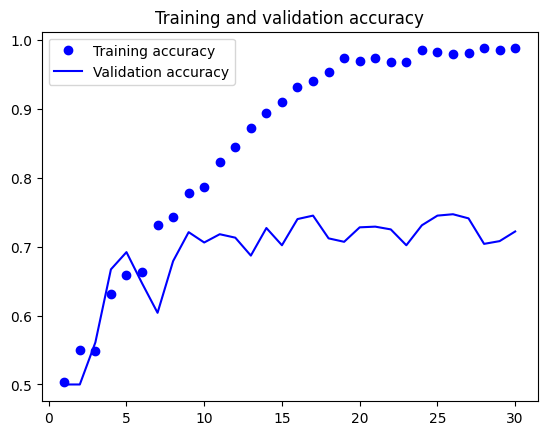

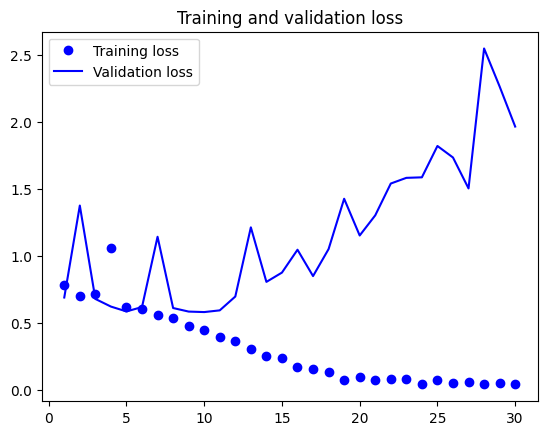

In [36]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [37]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 15s 231ms/step - loss: 0.5902 - accuracy: 0.7205
Test accuracy: 0.720


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [38]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

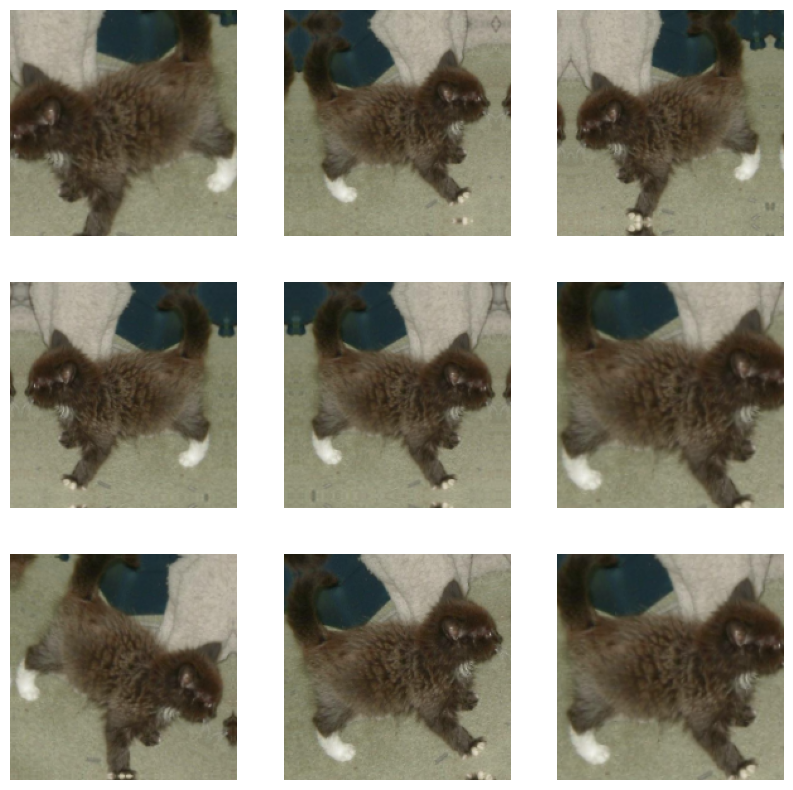

In [39]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [40]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 117s 2s/step - loss: 0.8016 - accuracy: 0.5035 - val_loss: 0.7118 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 97s 2s/step - loss: 0.6972 - accuracy: 0.5115 - val_loss: 0.6930 - val_accuracy: 0.5080
Epoch 3/100
63/63 [==============================] - 60s 938ms/step - loss: 0.6947 - accuracy: 0.5365 - val_loss: 0.6608 - val_accuracy: 0.5780
Epoch 4/100
63/63 [==============================] - 59s 936ms/step - loss: 0.6798 - accuracy: 0.6005 - val_loss: 0.6727 - val_accuracy: 0.6110
Epoch 5/100
63/63 [==============================] - 60s 953ms/step - loss: 0.6658 - accuracy: 0.6200 - val_loss: 0.6367 - val_accuracy: 0.6400
Epoch 6/100
63/63 [==============================] - 59s 932ms/step - loss: 0.6409 - accuracy: 0.6490 - val_loss: 0.7015 - val_accuracy: 0.6050
Epoch 7/100
63/63 [==============================] - 58s 927ms/step - loss: 0.6214 - accuracy: 0.6740 - val_loss: 0.6575 - val_accuracy: 0.64

Epoch 41/100
63/63 [==============================] - 59s 943ms/step - loss: 0.2414 - accuracy: 0.9045 - val_loss: 0.6351 - val_accuracy: 0.8100
Epoch 42/100
63/63 [==============================] - 60s 960ms/step - loss: 0.2390 - accuracy: 0.8975 - val_loss: 1.3136 - val_accuracy: 0.7050
Epoch 43/100
63/63 [==============================] - 60s 959ms/step - loss: 0.2616 - accuracy: 0.8985 - val_loss: 0.6298 - val_accuracy: 0.8090
Epoch 44/100
63/63 [==============================] - 60s 944ms/step - loss: 0.2450 - accuracy: 0.9005 - val_loss: 0.7379 - val_accuracy: 0.7810
Epoch 45/100
63/63 [==============================] - 60s 959ms/step - loss: 0.2274 - accuracy: 0.9060 - val_loss: 0.6878 - val_accuracy: 0.8030
Epoch 46/100
63/63 [==============================] - 60s 950ms/step - loss: 0.2035 - accuracy: 0.9230 - val_loss: 0.7155 - val_accuracy: 0.8020
Epoch 47/100
63/63 [==============================] - 64s 1s/step - loss: 0.2083 - accuracy: 0.9200 - val_loss: 0.6298 - val_accur

63/63 [==============================] - 64s 1s/step - loss: 0.1432 - accuracy: 0.9595 - val_loss: 1.1174 - val_accuracy: 0.8080
Epoch 98/100
63/63 [==============================] - 63s 1s/step - loss: 0.1352 - accuracy: 0.9605 - val_loss: 1.3375 - val_accuracy: 0.8190
Epoch 99/100
63/63 [==============================] - 61s 964ms/step - loss: 0.1656 - accuracy: 0.9515 - val_loss: 0.9264 - val_accuracy: 0.8380
Epoch 100/100
63/63 [==============================] - 67s 1s/step - loss: 0.1372 - accuracy: 0.9570 - val_loss: 1.1353 - val_accuracy: 0.8310


**Evaluating the model on the test set**

In [42]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 15s 232ms/step - loss: 0.5369 - accuracy: 0.7790
Test accuracy: 0.779


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [43]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 5s 0us/step


In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [45]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 1s/step


In [46]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [47]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 46ms/step - loss: 12.6106 - accuracy: 0.9325 - val_loss: 3.8898 - val_accuracy: 0.9690
Epoch 2/20
63/63 [==============================] - 3s 43ms/step - loss: 4.4739 - accuracy: 0.9710 - val_loss: 14.8421 - val_accuracy: 0.9340
Epoch 3/20
63/63 [==============================] - 3s 43ms/step - loss: 1.4720 - accuracy: 0.9895 - val_loss: 11.9660 - val_accuracy: 0.9430
Epoch 4/20
63/63 [==============================] - 3s 49ms/step - loss: 1.0010 - accuracy: 0.9925 - val_loss: 3.6704 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 3s 55ms/step - loss: 1.9432 - accuracy: 0.9875 - val_loss: 4.8065 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 4s 56ms/step - loss: 1.6089 - accuracy: 0.9905 - val_loss: 3.9169 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 3s 46ms/step - loss: 0.4709 - accuracy: 0.9945 - val_loss: 4.7079 - val_accuracy: 0.9730
Epoch 8/20

**Plotting the results**

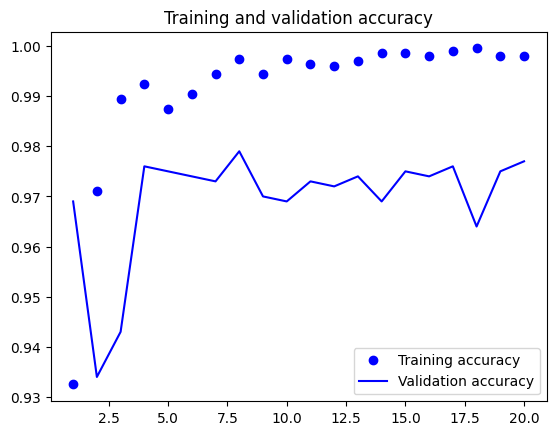

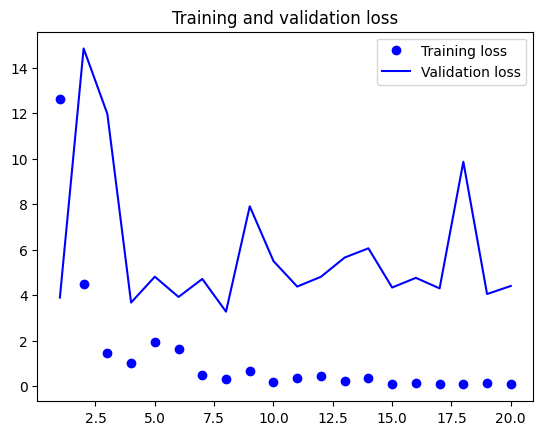

In [48]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [49]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [50]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [51]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [52]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [53]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 235s 4s/step - loss: 16.3398 - accuracy: 0.8880 - val_loss: 4.3018 - val_accuracy: 0.9650
Epoch 2/50
63/63 [==============================] - 241s 4s/step - loss: 6.1430 - accuracy: 0.9505 - val_loss: 3.6075 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 261s 4s/step - loss: 4.6892 - accuracy: 0.9570 - val_loss: 4.2873 - val_accuracy: 0.9710
Epoch 4/50
63/63 [==============================] - 253s 4s/step - loss: 4.5823 - accuracy: 0.9690 - val_loss: 4.4213 - val_accuracy: 0.9710
Epoch 5/50
63/63 [==============================] - 231s 4s/step - loss: 2.7652 - accuracy: 0.9720 - val_loss: 5.9110 - val_accuracy: 0.9660
Epoch 6/50
63/63 [==============================] - 227s 4s/step - loss: 2.3037 - accuracy: 0.9720 - val_loss: 14.5357 - val_accuracy: 0.9430
Epoch 7/50
63/63 [==============================] - 232s 4s/step - loss: 1.4687 - accuracy: 0.9835 - val_loss: 5.6019 - val_accuracy: 0.9710
Epoch 8/50


63/63 [==============================] - 225s 4s/step - loss: 0.1811 - accuracy: 0.9955 - val_loss: 2.4431 - val_accuracy: 0.9760
Epoch 42/50
63/63 [==============================] - 226s 4s/step - loss: 0.7340 - accuracy: 0.9900 - val_loss: 2.9661 - val_accuracy: 0.9790
Epoch 43/50
63/63 [==============================] - 226s 4s/step - loss: 0.4046 - accuracy: 0.9940 - val_loss: 3.3895 - val_accuracy: 0.9750
Epoch 44/50
63/63 [==============================] - 226s 4s/step - loss: 0.3717 - accuracy: 0.9945 - val_loss: 3.7330 - val_accuracy: 0.9750
Epoch 45/50
63/63 [==============================] - 227s 4s/step - loss: 0.3813 - accuracy: 0.9945 - val_loss: 2.6897 - val_accuracy: 0.9770
Epoch 46/50
63/63 [==============================] - 226s 4s/step - loss: 0.5580 - accuracy: 0.9945 - val_loss: 2.5952 - val_accuracy: 0.9810
Epoch 47/50
63/63 [==============================] - 228s 4s/step - loss: 0.4514 - accuracy: 0.9940 - val_loss: 2.8093 - val_accuracy: 0.9800
Epoch 48/50
63/63 

**Evaluating the model on the test set**

In [54]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 323s 5s/step - loss: 4.3487 - accuracy: 0.9740
Test accuracy: 0.974


### Fine-tuning a pretrained model

In [55]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [56]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [57]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11398s 184s/step - loss: 0.6656 - accuracy: 0.9935 - val_loss: 2.3366 - val_accuracy: 0.9800
Epoch 2/30
63/63 [==============================] - 469s 7s/step - loss: 0.3783 - accuracy: 0.9915 - val_loss: 2.6465 - val_accuracy: 0.9840
Epoch 3/30
63/63 [==============================] - 473s 8s/step - loss: 0.0633 - accuracy: 0.9975 - val_loss: 3.0403 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 474s 8s/step - loss: 0.2122 - accuracy: 0.9940 - val_loss: 2.3097 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 11334s 183s/step - loss: 0.1356 - accuracy: 0.9950 - val_loss: 2.8331 - val_accuracy: 0.9780
Epoch 6/30
63/63 [==============================] - 457s 7s/step - loss: 0.3693 - accuracy: 0.9930 - val_loss: 3.3339 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 459s 7s/step - loss: 0.0883 - accuracy: 0.9965 - val_loss: 3.0493 - val_accuracy: 0.9810
Epoch

In [58]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 262s 4s/step - loss: 2.6507 - accuracy: 0.9750
Test accuracy: 0.975
